# 视觉皮层的结构
David H. Hubel and Torsten Wiesel 于19581 and 19592在猫身上做了一系列的实验（几年后在猴子身上做了实验），提出了视觉皮层的结构的极为重要的观点(作者于1981年获得了诺贝尔的生物或者医药学奖)。特别是他们的实验表明许多大脑皮层里的神经元只能感受一个小的局部感受野。这意味着它们只对位于视野有限区域的视觉刺激作出反应（见图13-1，其中五个神经元的局部感受野由虚线表示）。不同神经元的感受野可能重叠，它们共同作用于整个视野。此外，作者还发现，一些神经元只对水平线的图像作出反应，而另一些神经元只对具有不同取向的线起反应（两个神经元可能具有相同的感受野，但对不同的线取向作出反应）。他们还注意到一些神经元具有更大的感受野，它们对较复杂的模式进行反应，这些模式是低级模式的组合。这些观察结果表明，更高层次的神经元是基于相邻低级别神经元的输出（图13-1，注意到每个神经元只连接到来自前一层的几个神经元）。这种强大的体系结构能够检测视野中任何区域的各种复杂模式。

![avatar](./images/13-1.png )
13-1 大脑皮层局部感受野

这些视觉皮层的研究启发了1980年引入的新认知，其逐渐演化为我们现在称之为卷积神经网络。一个重要的里程碑是由Yann LeCun、Léon Bottou、Yoshua Bengio和Patrick Haffner于1998撰写的篇论文，其中介绍了广泛用于识别手写支票号码的著名LeNET-5体系结构。这个体系结构有一些你已经知道的，比如全连接层和Sigmod激活函数，但是它也引入了两个新的块：卷积层和池化层。

# 卷积层
CNN最重要的组成部分是卷积层：第一卷积层中的神经元没有连接到输入图像中的每一个像素，而只是连接到它们接收域中的像素（见图13-2）。继续往下，第二卷积层中的每个神经元仅连接到位于第一层中的小矩形内的神经元。该体系结构允许网络聚集第一隐藏层中的低层特征，然后将其组装到下一隐藏层中的更高级别特征中，重复操作。这种分层结构在真实世界的图像中是常见的，这是CNNs为什么能很好地用于图像识别的原因之一。

![avatar](./images/13-2.png )
13-2 CNN中的矩形局部感知野

到目前为止，我们所看到的所有多层神经网络都有由一长串神经元组成的层，在输入到神经网络之前我们必须将输入图像压缩成1D。 现在，每个图层都以2D表示，这使得神经元与其相应的输入进行匹配变得更加容易。

位于给定层的行i、j列中的神经元连接到前一层输出端位于i行到i+$f_h$-1的列中的，列j到j+$f_w$-1的神经元，其中fh和fw是感知野的高度和宽度（见图13-3）。为了使层具有与前一层相同的高度和宽度，通常在输入周围添加零点，如图所示。这叫做零填充。

![avatar](./images/13-3.png )
13-3 层间连接和零填充

也可以通过将接收区间隔开的方法，将一个大的输入层连接到一个更小的层，如图13-4所示。两个连续接收场之间的距离称为步幅。在图中，5×7输入层（加零填充）连接到3×4层，使用3×3接收场和2步（在此）。举例来说，步幅在两个方向是相同的，但不是必须的。位于上行i、j列中的神经元连接到位于i×$s_h$ 到i×$s_h$+$f_h$-1的列中的神经元的输出端，列j×$s_w$到j×$s_w$+$f_w$-1，其中$s_h$和$s_w$是垂直和水平的步幅。

![avatar](./images/13-4.png )
13-4 使用2的步幅来减少维度

# 卷积核
神经元的权重可以表示为接受域大小的小图像。例如，图13-5显示了两种可能的权重集合，称为过滤器（或卷积内核）。第一个表示为一个黑色的正方形，中间有一个垂直的白线（它是一个7×7的矩阵，除了充满了1的中心柱，其余都是0），使用这些权值的神经元将忽略除了中心垂直线之外的所有接受域中的所有权重（因为除了位于中心垂直线的那些权值，其它输入都将乘0）。第二卷积内核是中间有水平白线的黑色正方形。类似的，使用这些权值的神经元将忽略其接受域中的一切，除了中心水平线。

现在，如果层中的所有神经元使用相同的垂直卷积内核（相同的偏置项），并且给网络输入图13-5所示的输入图像（底部图像），则该层将输出左上角图像。请注意，垂直白线得到增强，其余部分变得模糊。类似地，如果所有神经元使用水平卷积内核，则右上图像是可以看到的；注意水平白线增强，而其余部分则模糊。因此，使用相同的卷积内核的神经元层可以给您提供一个特征映射，它突出了图像中与卷积内核最相似的区域。在训练期间，CNN发现其任务中最有用的卷积内核，并且学习将它们组合成更复杂的模式（例如，交叉是图像中垂直卷积内核和水平卷积内核都是活动的区域）。

![avatar](./images/13-5.png )
13-5 使用2的步幅来减少维度

# 叠加的多个特征图
到目前为止，为了简单起见，我们已经将每个卷积层表示为一个薄的2D层，但实际上它是由几个大小相等的特征图组成的，因此它在3D中更准确地表示（见图13-6）。在一个特征映射中，所有神经元共享相同的参数（权重和偏置项），但不同的特征映射可能具有不同的参数。神经元的感受野与前面描述的一样，但它延伸到所有先前的层的特征图。简而言之，卷积层同时将多个滤波器应用到其输入，使得它能够在其输入中的任何地方检测多个特征。

在特征图中的所有神经元共享相同参数的事实极大地减少了模型中参数的数量，但最重要的是，一旦美国有线电视新闻网学会了在一个位置识别模式，它就可以在任何其他位置识别它。相反，一旦一个规则的DNN学会了在一个位置识别一个模式，它只能在那个特定的位置识别它。

此外，输入图像也由多个子层组成：一个颜色每一个。奈尔通常有三种：红、绿、蓝（RGB）。灰度图像只是一个通道，但一些图像可能有更多，例如，卫星图像捕获额外的光频率（如红外线）。

![avatar](./images/13-6.png )
13-６ 有三通道的多特征图卷积层

具体而言，位于给定卷积层l中的特征图K的行i、列j中的神经元连接着前一层l-1中的神经元的输出，其位于l-1层中行i×$s_h$ 到i×$s_h$+$f_h$-1,列j×$s_w$到j×$s_w$+$f_w$-1的所有特征图上。注意，位于同一行i和列j但在不同特征图中的所有神经元连接到前一层中完全相同的神经元的输出。

公式13-1　在一个长的数学方程中总结了前面的解释：它展示了如何计算卷积层中给定神经元的输出。由于很多不同的索引，这个公式有点难理解，但它所做的是计算所有输入的加权和，再加上偏置项。
方程13-1。计算卷积层中神经元的输出

![](./images/e13-1.png)

• $z_{i,j,k} $ 是卷积层（l层）的特征图k中的行i,j中的神经元的输出。

• $s_h$和$s_w$是垂直和水平的步幅, $f_h$和$f_w$是感受野的高度和宽度，$f_{n^{'}}$是前一层（l-1层）中的特征图的数量。

• $x_{i^{'},j^{'}, k^{'}} $是位于l-1层中行$i^{'}$、列$j^{'}$中的神经元的输出，如果前一层是输入层，则$k^{'}$（或通道$k^{'}$）。

• $b^{k}$是特征图ｋ（l层中）的偏倚项。你可以把它当作一个旋钮来调整特征图K的整体亮度。

• $w_{u, v,k^{'}, k} $是l层中特征图k中的任何神经元与位于第u行、v列（相对于神经元的感受野）的输入和特征映射$k^{'}$之间的连接权重。

# TensorFlow实现
在TensorFlow中，每个输入图像通常被表示为[高度、宽度、通道]的3D张量。一个小批量的输入表示为4D张量的[批量大小，高度，宽度，通道]。卷积层的权重表示为[$f——h$，$f_w$，$f_{n^{’}}$，$f_n$]的4D张量。卷积层的偏置项简单地表示为形状的1D张量[$f_n$]。
看一个简单的例子。下面的代码加载两个示例图像，使用Scikit-Learn的 load_sample_images()（加载两个彩色图像，一个是中华寺，另一个是花）。然后，创建两个7×7滤波器（一个中间有一个垂直的白线，另一个中间有一个水平的白线），并使用TensorFlow的tf.nn.conv2d()函数（零填充和步幅2）构建的卷积层将它们应用于两个图像。最后，它绘制了一个结果特征图（类似于图13-5中的右上角图像）。

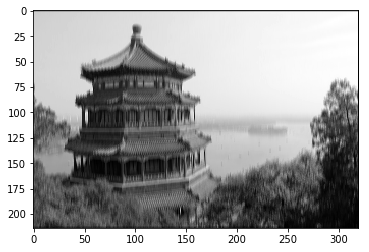

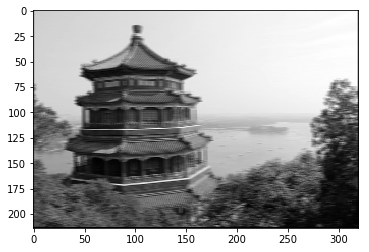

In [2]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
'''
  Args:
    input: A `Tensor`. Must be one of the following types: `half`, `float32`.
      A 4-D tensor. The dimension order is interpreted according to the value
      of `data_format`, see below for details.
    filter: A `Tensor`. Must have the same type as `input`.
      A 4-D tensor of shape
      `[filter_height, filter_width, in_channels, out_channels]`
    strides: A list of `ints`.
      1-D tensor of length 4.  The stride of the sliding window for each
      dimension of `input`. The dimension order is determined by the value of
        `data_format`, see below for details.
    padding: A `string` from: `"SAME", "VALID"`.
      The type of padding algorithm to use.
    use_cudnn_on_gpu: An optional `bool`. Defaults to `True`.
    data_format: An optional `string` from: `"NHWC", "NCHW"`. Defaults to `"NHWC"`.
      Specify the data format of the input and output data. With the
      default format "NHWC", the data is stored in the order of:
          [batch, height, width, channels].
      Alternatively, the format could be "NCHW", the data storage order of:
          [batch, channels, height, width].
    name: A name for the operation (optional).
  Returns:
    A `Tensor`. Has the same type as `input`.
    A 4-D tensor. The dimension order is determined by the value of
    `data_format`, see below for details.
'''

if __name__ == '__main__':
    # Load sample images
    china = load_sample_image("china.jpg")
    flower = load_sample_image("flower.jpg")
    dataset = np.array([china, flower], dtype=np.float32)
    batch_size, height, width, channels = dataset.shape
    # Create 2 filters
    filters = np.zeros(shape=(9, 9, channels, 2), dtype=np.float32)
    filters[:, 5, :, 0] = 1  # vertical line 前面的垂直核
    filters[5, :, :, 1] = 1  # horizontal line　水平核
    
    X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")
    
    with tf.Session() as sess:
        output = sess.run(convolution,feed_dict={X:dataset})

    plt.imshow(output[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
    plt.show()
    plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
    plt.show()      

大多数代码都是不需要解释，但是tf.nn.conv2d()值得一点解释：

• X是输入的小批量（4D张量）。

• filter是应用的一组卷积核（同样是4D张量）。

• strides是一个四个元素的1D矩阵，其中两个中心元素是垂直和水平的步幅（$s_h$和$s_w$）。第一个和最后一个元素当前必须等于1。有一天，它们可以用来指定批处理步长（跳过一些实例）和通道步幅（跳过一些前一层的特征图或通道）。

• 填充必须是“VALID”或“SAME”：
　——如果设置为“VALID”，卷积层不使用零填充，如图13-7所示,并且可以根据步幅忽略输入图像的右下角的一些行和列（为了简单起见，这里仅示出水平维度，但当然，同样的逻辑适用于垂直维度）。

　——如果设置为“SAME”，则卷积层在必要时使用零填充。在这种情况下，输出神经元的数量等于输入神经元的数目除以步幅，向上取整（在这个例子中，ceil（13/5）＝3）。然后在输入端尽可能均匀地加入零点。

![](./images/13-7.png)
13-7

在这个简单的例子中，我们手动创建了filter，但是在一个真实的CNN中，你会让训练算法自动发现最佳的过滤器。TensorFlow有一个tf.layers.conv2d() 函数，为您创建过滤器变量（卷积核），并随机初始化它。它还创建偏置变量（命名为偏置），并用零初始化它。例如，创建一个输入占位符，后面跟着一个卷积层，其中两个7×7个特征映射，使用2×2个步幅（注意这个函数只期望垂直和水平跨步），和“SAME”填充：

不幸的是，卷积层有相当多的超参数：你必须选择卷积核的数量，它们的高度和宽度，步幅和填充类型。与往常一样，可以使用交叉验证来找到正确的超参数值，但这非常耗时。稍后我们将讨论常见的CNN体系结构，以了解超参数值在实践中发挥的最佳作用。

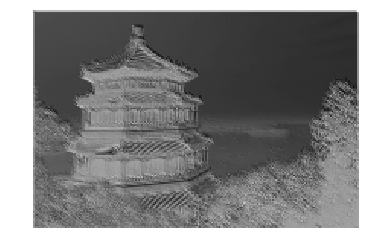

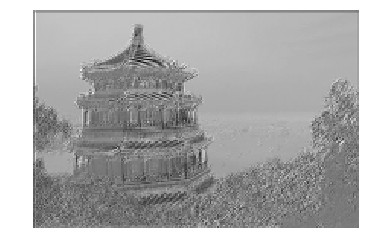

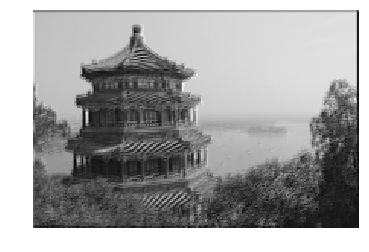

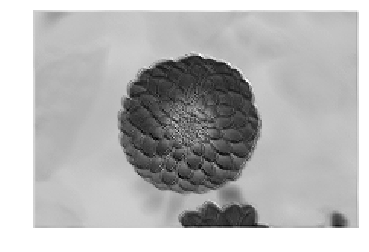

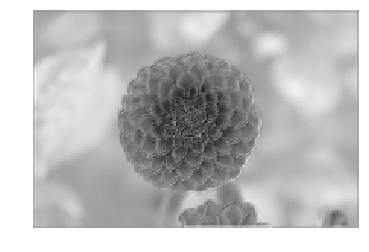

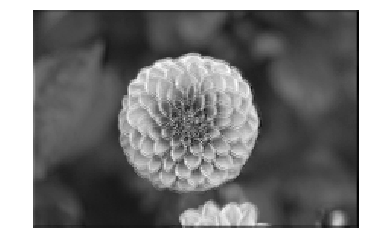

In [3]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=3, kernel_size=9, strides=[3,3],
                        padding="SAME")
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})
    
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")
    
for image_index in (0, 1):
    for feature_map_index in (0, 1, 2):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

# 内存需求
CNNs的另一个问题是卷积层需要巨大的量RAM，特别是在训练期间，因为反向传播的反向传递需要在正向传递期间计算的所有中间值。

例如，考虑具有filter大小5×5的卷积层，输出具有150×100大小的200个特征图，具有步幅1和零填充。如果输入是150×100 RGB图像（三个通道），则参数的数目是（5×5×3+1）×200＝15200（+1对应于偏置项），与全连接层相比，这是相当小的。然而，这些神经元需要计算其5×5×3＝75个输入的加权和：总共2亿2500万个浮点乘法。不像一个完全连接的层那么糟糕，但仍然相当计算密集型。此外，如果特征图用32位浮点来表示，那么卷积层的输出将占据200×150×100×32＝9600万比特（约11.4兆字节）的RAM。如果一个训练批包含100个实例，那么这个层将使用超过1GB的RAM！

在推理过程中（即当对新实例进行预测），一旦计算出下一层，就可以释放一层所占用的RAM，因此只需要两个连续层所需的RAM即可。但是在训练过程中，在前向传娣中计算的所有东西都需要保存为反向传递，所以所需的RAM量是（至少）所有层所需的RAM总量。
如果由于内存不足而导致训练失败，可以尝试减少mini-batch批大小。或者，您可以尝试使用步幅减少维度，或者删除几层。或者你可以尝试使用16位浮点而不是32位浮点。或者你可以在多设备上部署CNN。

现在让我们看一下CNNs的第二个共同构建块：池层。

# 池化层
一旦了解卷积层是如何工作的，池化层就很容易掌握了。他们的目标是对输入图像进行子采样（即收缩），以减少计算负载、内存使用和参数数量（从而限制过拟合的风险）。

就像卷积层一样，池中的每个神经元都连接到前一层中有限数量的神经元的输出，位于一个小的矩形感受野内。必须像以前一样定义它的大小、步幅和填充类型。然而，汇集神经元没有权重；它所做的是使用聚合函数（如最大值或平均值）聚合输入。图13-8显示了最大池化层，它是最常见的池层类型。在这个例子中，我们使用了一个2×2的池化核，步幅为2，没有填充。注意，只有每个核中的最大值进入下一层，其他输入被丢弃。

![](./images/13-8.png)
13-8

这显然是一个非常破坏性的层：即使有一个2×2的小内核和2的步幅，输出将在两个方向上小两倍（因此它的面积将是四倍小），简单地降低75%的输入值。

池化层通常独立地工作在每个输入通道上，因此输出深度与输入深度相同。也可以交替地在深度维度上池化，我们将看到，在这种情况下，图像的空间维度（高度和宽度）保持不变，但通道数量减少。

在TensorFlow中实现一个最大池化层是相当容易的。下面的代码使用2×2内核、步幅2和无填充创建最大池池，然后将其应用到数据集中的所有图像：

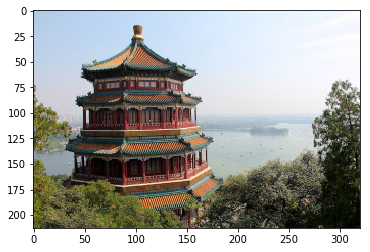

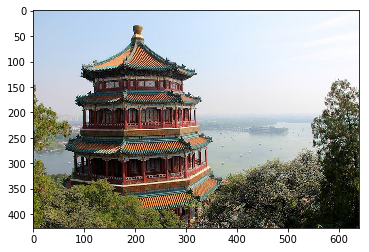

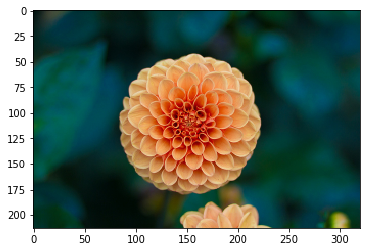

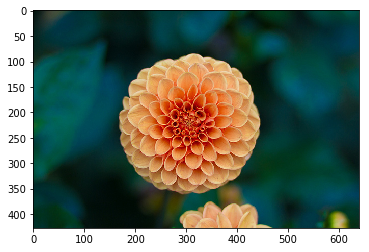

In [8]:
batch_size, height, width, channels = dataset.shape

#filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
#filters[:, 3, :, 0] = 1  # vertical line
#filters[3, :, :, 1] = 1  # horizontal line

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
pool = tf.nn.avg_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")
 
with tf.Session() as sess:
    output = sess.run(pool, feed_dict={X: dataset})
 
plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

plt.imshow(dataset[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()
plt.imshow(output[1].astype(np.uint8))  # plot the output for the 1st image
plt.show()

plt.imshow(dataset[1].astype(np.uint8))  # plot the output for the 1st image
plt.show()

ksize参数包含沿输入张量的所有四个维度的内核形状：[批大小、高度、宽度、通道]。TensorFlow目前不支持在多个实例上进行池合并，因此ksize的第一个元素必须等于1。此外，它不支持对空间维度（高度和宽度）和深度维度的同时池化，因此ksize[1]和ksize[2]都必须等于1，或者ksize[3]必须等于1。

若要创建一个平均池层，只需使用avg_pool()函数而不是max_pool()。

现在你知道所有创建卷积神经网络的模块。让我们看看如何组装它们。